Aim:Our Aim to form cluster of datapoints which are close to each other or/and have simillar traits. 

In [1]:
#We import following Libraries: numpy:to perform mathematical tasks.it stands for numerical python.
#pandas:sed for data cleaning,manipulation and Analysis.
#matplotlib.pyplot:it is udsed for plotting graphs.
#seaborn:used for data visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Importing Dataset

In [2]:
df=pd.read_csv("C:\\Users\\blaise correia\\Documents\\sally\\country-data.csv",header=0)#here header=0 implies first row is title row
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   165 non-null    float64
 7   life_expec  166 non-null    float64
 8   total_fer   163 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()#statistical information of only numeric data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,165.000000,166.000000,163.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.887206,70.559639,2.928589,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.590863,8.919933,1.496792,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.880000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.440000,73.150000,2.380000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.900000,76.800000,3.845000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.describe(include=['O'])#this gives information about the non-numeric data

,country
count,167
unique,167
top,Sri Lanka
freq,1


# Data Cleaning and Preprocessing

In [6]:
df.isnull().sum()#checking if we have any null values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     2
life_expec    1
total_fer     4
gdpp          0
dtype: int64

In [7]:
df = df.dropna()
df.shape

(160, 10)

In [8]:
df #data after dealing with null values

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [9]:
df["country"].value_counts()#it gives count of unique values in descending order

Uganda           1
Lithuania        1
Timor-Leste      1
Armenia          1
Argentina        1
                ..
Kazakhstan       1
Kuwait           1
Lao              1
United States    1
Niger            1
Name: country, Length: 160, dtype: int64

In [10]:
df['country'].describe()

count        160
unique       160
top       Uganda
freq           1
Name: country, dtype: object

<AxesSubplot:ylabel='country'>

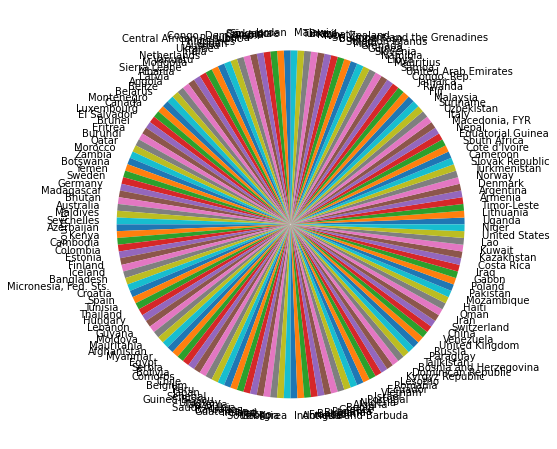

In [11]:
df["country"].value_counts().plot(kind='pie',figsize=(15,8))

In [12]:
#From the above graph we can clearly see that each countrly is equally distributed.

# Detecting Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='child_mort'>

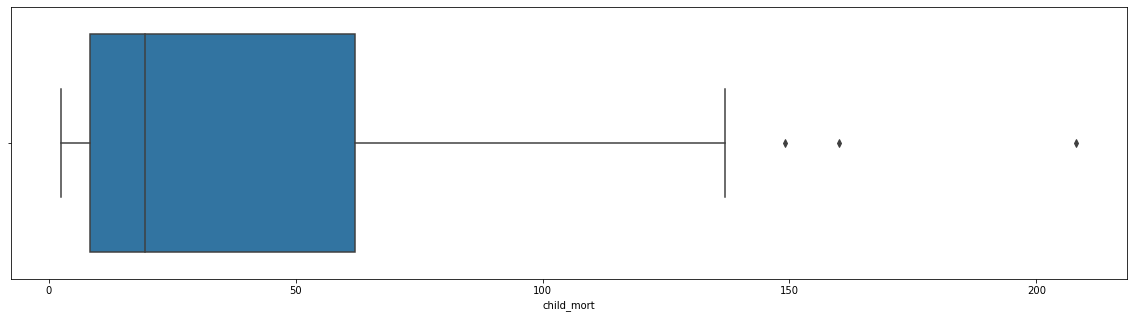

In [13]:
plt.figure(figsize=(20,5))
sns.boxplot(df['child_mort'])

In [14]:
#check IQR strategy
Q1 = df.child_mort.quantile(0.25)
Q3 = df.child_mort.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['child_mort']<lower) | (df['child_mort']>upper)]

print("Number of Outliers Detected in child_mort:",df2.shape[0])

Number of Outliers Detected in child_mort: 3


In [15]:
# check quantile strategy
# quantile way of outlier

max_val = df['child_mort'].quantile(0.95)        # df.child_mort.quantile(0.95)
min_val = df['child_mort'].quantile(0.05)        # df.child_mort.quantile(0.05)

df3 = df[(df['child_mort']<min_val) | (df['child_mort']>max_val)]

print("Number of Outliers Detected in child_mort:",df3.shape[0])

Number of Outliers Detected in child_mort: 15


In [16]:
for i,data in df.iterrows():
    if data['child_mort']<lower:
        df.at[i,'child_mort']=lower  # random no in proper range
    elif data['child_mort']>upper:
        df.at[i,'child_mort']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='child_mort'>

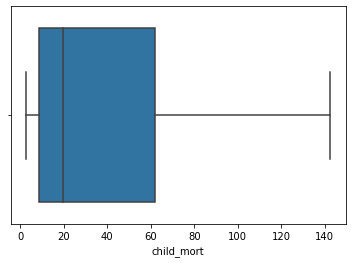

In [17]:
import seaborn as sns
sns.boxplot(df['child_mort'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exports'>

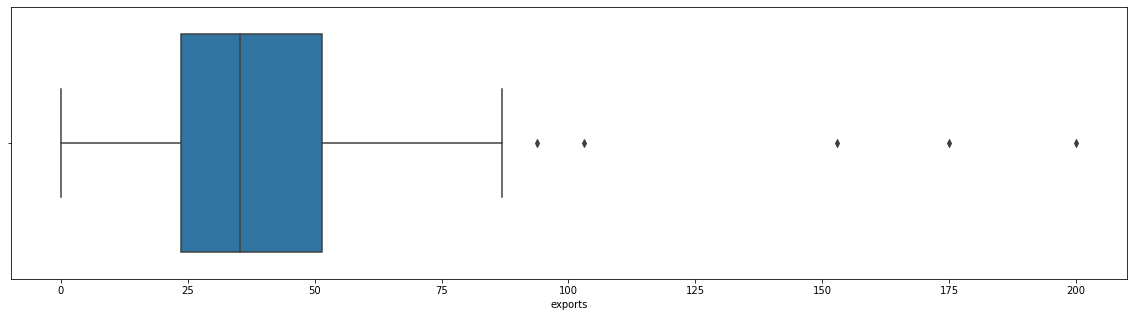

In [18]:
plt.figure(figsize=(20,5))
sns.boxplot(df['exports'])

In [19]:
#check IQR strategy
Q1 = df.exports.quantile(0.25)
Q3 = df.exports.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['exports']<lower) | (df['exports']>upper)]

print("Number of Outliers Detected in exports:",df2.shape[0])

Number of Outliers Detected in exports: 5


In [20]:
# check quantile strategy
# quantile way of outlier

max_val = df['exports'].quantile(0.95)        # df.exports.quantile(0.95)
min_val = df['exports'].quantile(0.05)        # df.exports.quantile(0.05)

df3 = df[(df['exports']<min_val) | (df['exports']>max_val)]

print("Number of Outliers Detected in exports:",df3.shape[0])

Number of Outliers Detected in exports: 16


In [21]:
for i,data in df.iterrows():
    if data['exports']<lower:
        df.at[i,'exports']=lower  # random no in proper range
    elif data['exports']>upper:
        df.at[i,'exports']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exports'>

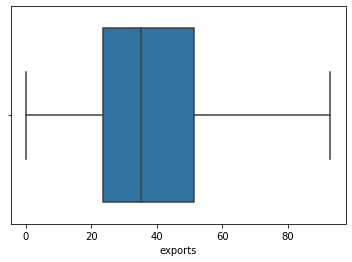

In [22]:
import seaborn as sns
sns.boxplot(df['exports'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='health'>

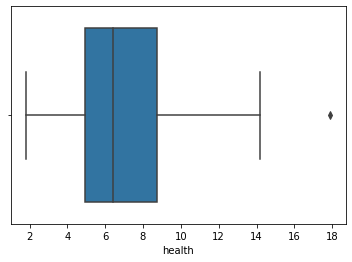

In [23]:
import seaborn as sns
sns.boxplot(df['health'])

In [24]:
#check IQR strategy
Q1 = df.exports.quantile(0.25)
Q3 = df.exports.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['health']<lower) | (df['health']>upper)]

print("Number of Outliers Detected in health:",df2.shape[0])

Number of Outliers Detected in health: 0


In [25]:
# check quantile strategy
# quantile way of outlier

max_val = df['health'].quantile(0.95)        # df.health.quantile(0.95)
min_val = df['health'].quantile(0.05)        # df.health.quantile(0.05)

df3 = df[(df['health']<min_val) | (df['health']>max_val)]

print("Number of Outliers Detected in health:",df3.shape[0])

Number of Outliers Detected in health: 15


In [26]:
for i,data in df.iterrows():
    if data['health']<lower:
        df.at[i,'health']=lower  # random no in proper range
    elif data['health']>upper:
        df.at[i,'health']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='health'>

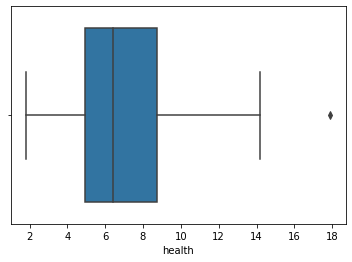

In [27]:
import seaborn as sns
sns.boxplot(df['health'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imports'>

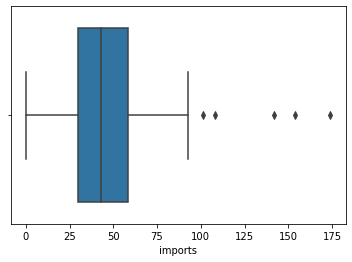

In [28]:
import seaborn as sns
sns.boxplot(df['imports'])

In [29]:
#check IQR strategy
Q1 = df.imports.quantile(0.25)
Q3 = df.imports.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['imports']<lower) | (df['imports']>upper)]

print("Number of Outliers Detected in imports:",df2.shape[0])

Number of Outliers Detected in imports: 5


In [30]:
# check quantile strategy
# quantile way of outlier

max_val = df['imports'].quantile(0.95)        # df.imports.quantile(0.95)
min_val = df['imports'].quantile(0.05)        # df.imports.quantile(0.05)

df3 = df[(df['imports']<min_val) | (df['imports']>max_val)]

print("Number of Outliers Detected in imports:",df3.shape[0])

Number of Outliers Detected in imports: 16


In [31]:
for i,data in df.iterrows():
    if data['imports']<lower:
        df.at[i,'imports']=lower  # random no in proper range
    elif data['imports']>upper:
        df.at[i,'imports']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imports'>

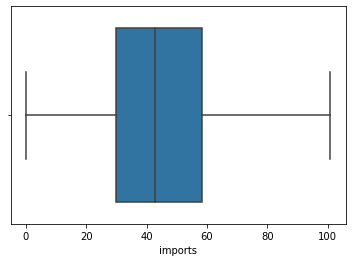

In [32]:
import seaborn as sns
sns.boxplot(df['imports'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income'>

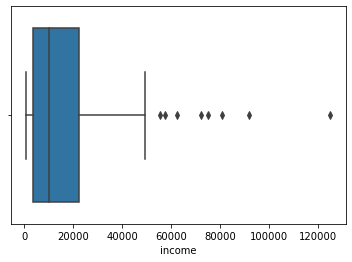

In [33]:
import seaborn as sns
sns.boxplot(df['income'])

In [34]:
#check IQR strategy
Q1 = df.income.quantile(0.25)
Q3 = df.income.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['income']<lower) | (df['income']>upper)]

print("Number of Outliers Detected in income:",df2.shape[0])

Number of Outliers Detected in income: 8


In [35]:
# check quantile strategy
# quantile way of outlier

max_val = df['income'].quantile(0.95)        # df.income.quantile(0.95)
min_val = df['income'].quantile(0.05)        # df.income.quantile(0.05)

df3 = df[(df['imports']<min_val) | (df['income']>max_val)]

print("Number of Outliers Detected in income:",df3.shape[0])

Number of Outliers Detected in income: 160


In [36]:
for i,data in df.iterrows():
    if data['income']<lower:
        df.at[i,'income']=lower  # random no in proper range
    elif data['income']>upper:
        df.at[i,'income']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income'>

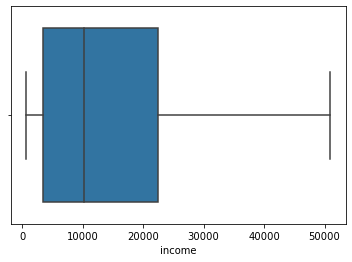

In [37]:
import seaborn as sns
sns.boxplot(df['income'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inflation'>

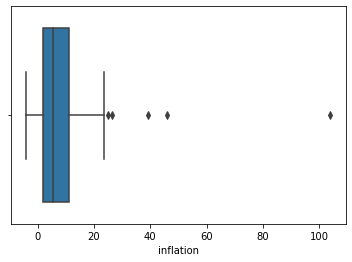

In [38]:
import seaborn as sns
sns.boxplot(df['inflation'])

In [39]:
#check IQR strategy
Q1 = df.inflation.quantile(0.25)
Q3 = df.inflation.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['inflation']<lower) | (df['inflation']>upper)]

print("Number of Outliers Detected in inflation:",df2.shape[0])

Number of Outliers Detected in inflation: 5


In [40]:
# check quantile strategy
# quantile way of outlier

max_val = df['inflation'].quantile(0.95)        # df.inflation.quantile(0.95)
min_val = df['inflation'].quantile(0.05)        # df.inflation.quantile(0.05)

df3 = df[(df['inflation']<min_val) | (df['inflation']>max_val)]

print("Number of Outliers Detected in inflation:",df3.shape[0])

Number of Outliers Detected in inflation: 16


In [41]:
for i,data in df.iterrows():
    if data['inflation']<lower:
        df.at[i,'inflation']=lower  # random no in proper range
    elif data['inflation']>upper:
        df.at[i,'inflation']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inflation'>

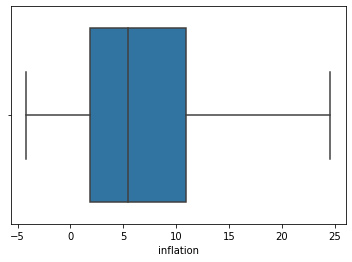

In [42]:
import seaborn as sns
sns.boxplot(df['inflation'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='life_expec'>

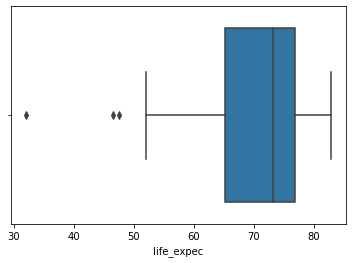

In [43]:
import seaborn as sns
sns.boxplot(df['life_expec'])

In [44]:
#check IQR strategy
Q1 = df.life_expec.quantile(0.25)
Q3 = df.life_expec.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['life_expec']<lower) | (df['life_expec']>upper)]

print("Number of Outliers Detected in life_expec:",df2.shape[0])

Number of Outliers Detected in life_expec: 3


In [45]:
# check quantile strategy
# quantile way of outlier

max_val = df['life_expec'].quantile(0.95)        # df.life_expec.quantile(0.95)
min_val = df['life_expec'].quantile(0.05)        # df.life_expec.quantile(0.05)

df3 = df[(df['life_expec']<min_val) | (df['life_expec']>max_val)]

print("Number of Outliers Detected in life_expec:",df3.shape[0])

Number of Outliers Detected in life_expec: 16


In [46]:
for i,data in df.iterrows():
    if data['life_expec']<lower:
        df.at[i,'life_expec']=lower  # random no in proper range
    elif data['life_expec']>upper:
        df.at[i,'life_expec']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='life_expec'>

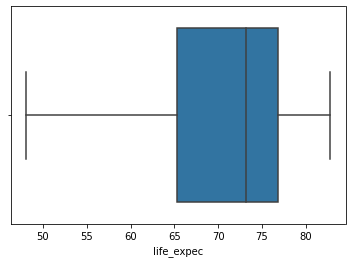

In [47]:
import seaborn as sns
sns.boxplot(df['life_expec'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_fer'>

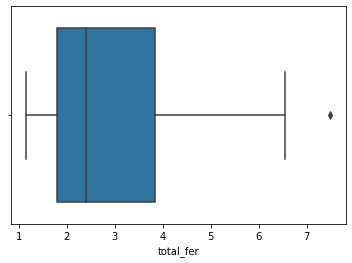

In [48]:
import seaborn as sns
sns.boxplot(df['total_fer'])

In [49]:
#check IQR strategy
Q1 = df.total_fer.quantile(0.25)
Q3 = df.total_fer.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['total_fer']<lower) | (df['total_fer']>upper)]

print("Number of Outliers Detected in total_fer:",df2.shape[0])

Number of Outliers Detected in total_fer: 1


In [50]:
# check quantile strategy
# quantile way of outlier

max_val = df['total_fer'].quantile(0.95)        # df.total_fer.quantile(0.95)
min_val = df['total_fer'].quantile(0.05)        # df.total_fer.quantile(0.05)

df3 = df[(df['total_fer']<min_val) | (df['total_fer']>max_val)]

print("Number of Outliers Detected in total_fer:",df3.shape[0])

Number of Outliers Detected in total_fer: 16


In [51]:
for i,data in df.iterrows():
    if data['total_fer']<lower:
        df.at[i,'total_fer']=lower  # random no in proper range
    elif data['total_fer']>upper:
        df.at[i,'total_fer']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_fer'>

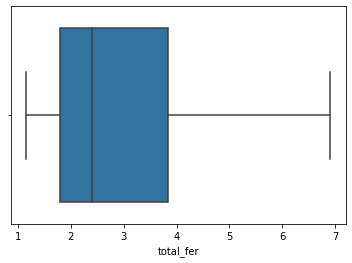

In [52]:
import seaborn as sns
sns.boxplot(df['total_fer'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdpp'>

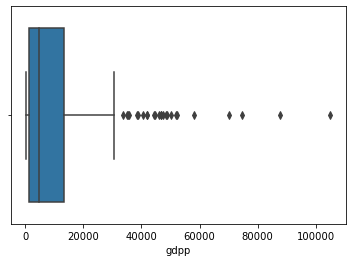

In [53]:
import seaborn as sns
sns.boxplot(df['gdpp'])

In [54]:
#check IQR strategy
Q1 = df.gdpp.quantile(0.25)
Q3 = df.gdpp.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df[(df['gdpp']<lower) | (df['gdpp']>upper)]

print("Number of Outliers Detected in gdpp:",df2.shape[0])

Number of Outliers Detected in gdpp: 25


In [55]:
# check quantile strategy
# quantile way of outlier

max_val = df['gdpp'].quantile(0.95)        # df.gdpp.quantile(0.95)
min_val = df['gdpp'].quantile(0.05)        # df.gdpp.quantile(0.05)

df3 = df[(df['gdpp']<min_val) | (df['gdpp']>max_val)]

print("Number of Outliers Detected in gdpp:",df3.shape[0])

Number of Outliers Detected in gdpp: 16


In [56]:
for i,data in df.iterrows():
    if data['gdpp']<lower:
        df.at[i,'gdpp']=lower  # random no in proper range
    elif data['gdpp']>upper:
        df.at[i,'gdpp']=upper  # random no in proper range

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdpp'>

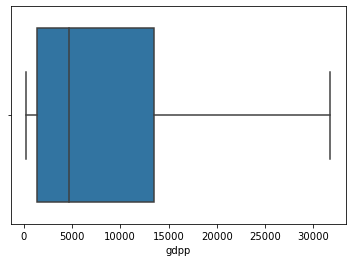

In [57]:
import seaborn as sns
sns.boxplot(df['gdpp'])

# Graphs for better visualization.

<function matplotlib.pyplot.show(close=None, block=None)>

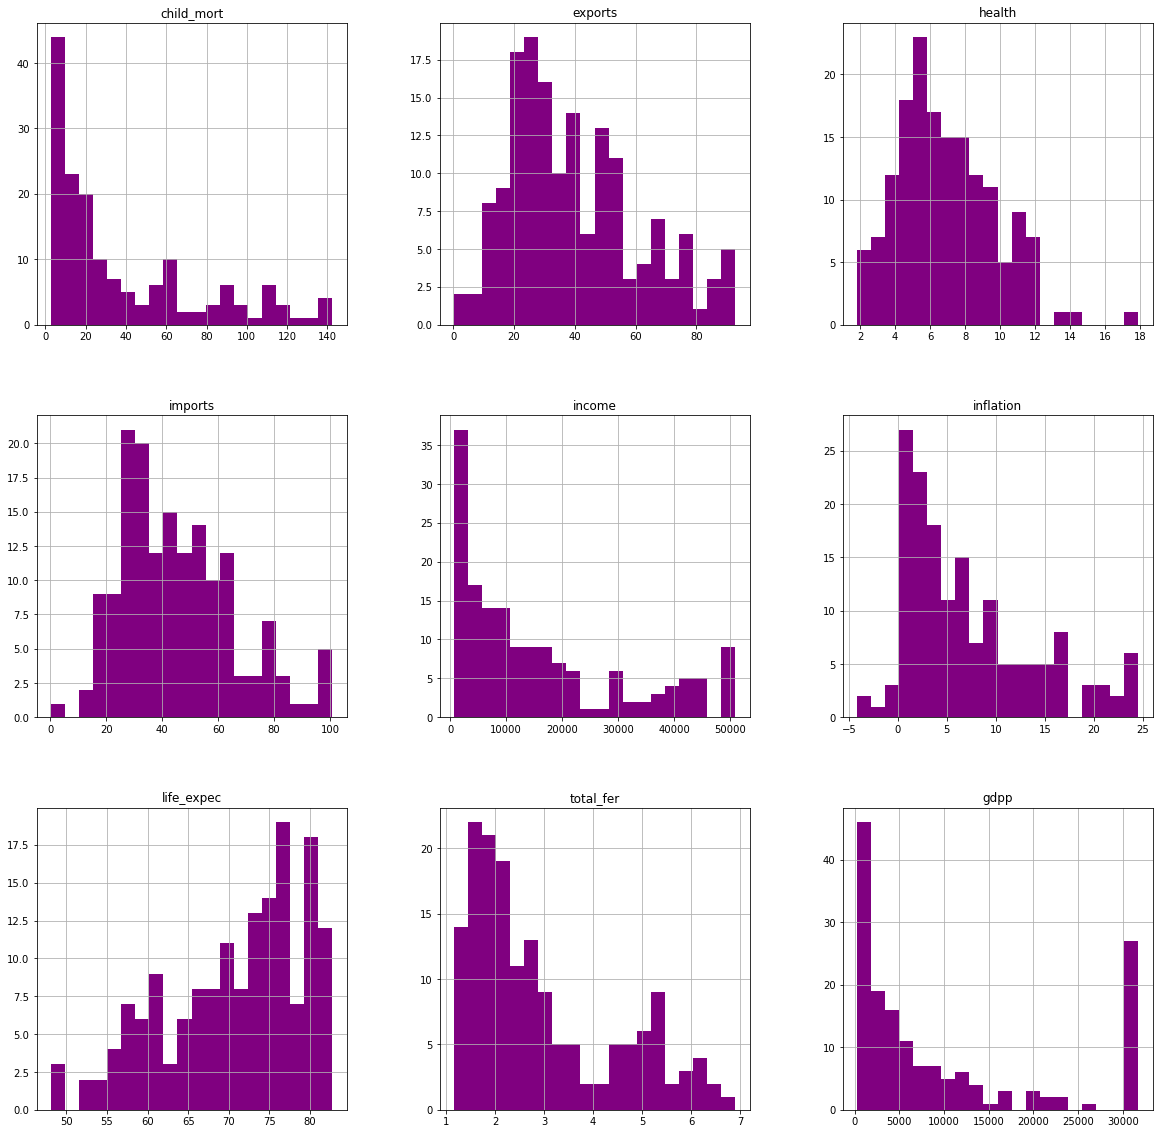

In [58]:
df.hist(bins=20, figsize= (20,20), color="purple")#histogram plots for all the columns
plt.show

<AxesSubplot:>

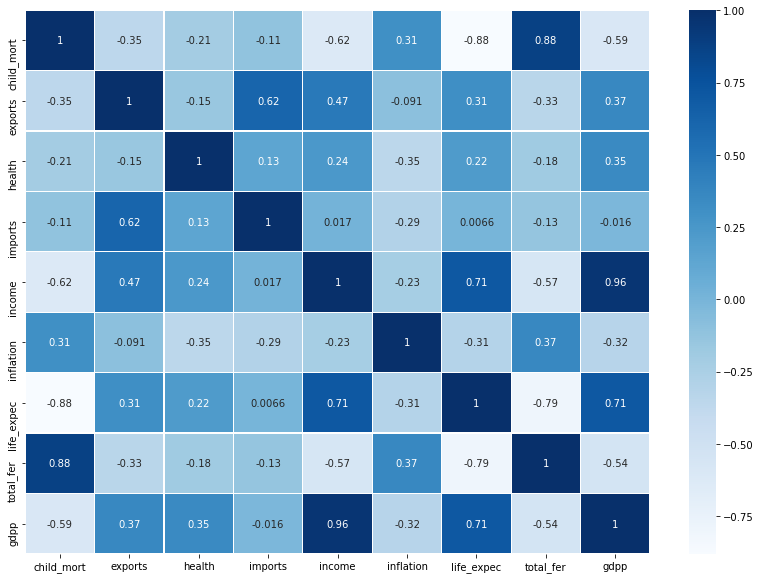

In [60]:
colormap=plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap=colormap,linewidths=0.2)

gdpp and income,imports and exports,child_mort and total_fert are highly positive correlated
whereas life_expec and child_mort are highly negative correlated

In [61]:
data=df.drop(['country'],axis=1)

In [62]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

In [63]:
# print scaled dataset
scaled_df=pd.DataFrame(scaled,columns=data.columns)

# K-Means

In [64]:
#KMean is mostly commonly used clustering algorithm.
#Kmeans Algorithm is an Iterative algorithm that divides a group of  datasets into  subgroups or clusters as we generally call. 
#Based on the mean distance of a datapoint from the centroid of the clusters are formed. 

In [65]:
x=df.iloc[:,[1,9]]#here we conside to columns child mortality and gdp

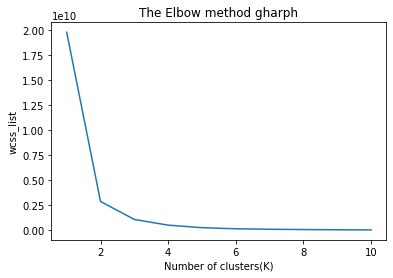

In [66]:
#finding optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss_list=[]#Initializing the list for the values of WCSs
#Using for loop for itterations from 1 to 10.Elbow technique
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    Kmeans.fit(x)
    wcss_list.append(Kmeans.inertia_)
plt.plot(range(1,11), wcss_list)
plt.title('The Elbow method gharph')
plt.xlabel('Number of clusters(K)')
plt.ylabel('wcss_list')
plt.show()

In [67]:
#What is elbow method?
#It a method used to find what is the suitable number of clusters.
# First we calculate WCSS(Within cluster sum of square) for each value of clusters.
#Then plot the garph with number of clusters v/s wcss 
#The plot looks likes an elbow with a sharp point the point where it bends is the best value for clusters.
#In the above graph we can see that the bend is at 2 position so there will be 2 clusters.

In [68]:
########Part2##################
Kmeans=KMeans(n_clusters=2, init='k-means++',random_state=42)
y_predict=Kmeans.fit_predict(x)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [69]:
x=x.values

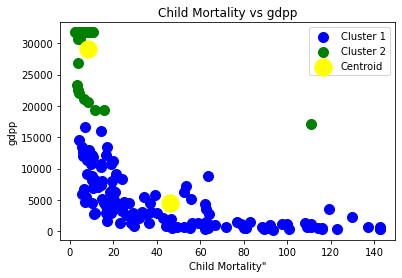

In [70]:
###################visualize cluster
#visulaizing the clusters
#y-predict ranges from 0(Low) to 1(high)
plt.scatter(x[y_predict ==0, 0], x[y_predict ==0, 1], s = 100, c = 'blue', label = 'Cluster 1')#for the first ckuster
plt.scatter(x[y_predict ==1, 0], x[y_predict ==1, 1], s = 100, c = 'green', label = 'Cluster 2')#for the second cluster
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Child Mortality vs gdpp')
plt.xlabel('Child Mortality"')
plt.ylabel('gdpp')
plt.legend()
plt.show()


#K-means is sensitive to outliers
#it is suitable for compact and well-separated clusters
#it is slow

In [71]:
#cluster 1 is the one with low child mortality and high gdp.
#cluster2 is the one with high child mortality and low gdp.
#(child mortality=death of students below the age of 5)

In [72]:
x=df.iloc[:,[6,9]]#here we take inflation and gdp

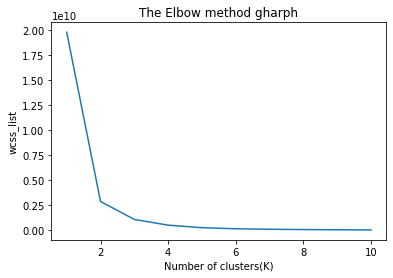

In [73]:
#finding optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss_list=[]#Initializing the list for the values of WCSs
#Using for loop for itterations from 1 to 10.Elbow technique
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    Kmeans.fit(x)
    wcss_list.append(Kmeans.inertia_)
plt.plot(range(1,11), wcss_list)
plt.title('The Elbow method gharph')
plt.xlabel('Number of clusters(K)')
plt.ylabel('wcss_list')
plt.show()

In [74]:
########Part2##################
Kmeans=KMeans(n_clusters=3, init='k-means++',random_state=42)
y_predict=Kmeans.fit_predict(x)
y_predict

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2,
       0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0,
       1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2,
       0, 0, 2, 0, 0, 0])

In [75]:
x=x.values

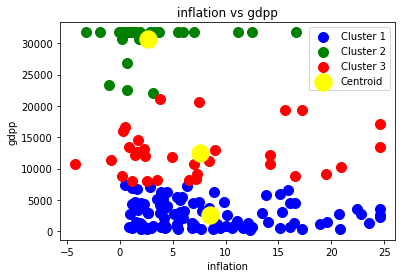

In [76]:
###################visualize cluster
#visulaizing the clusters
#y-predict ranges from 0(Low) to 1(high)
plt.scatter(x[y_predict ==0, 0], x[y_predict ==0, 1], s = 100, c = 'blue', label = 'Cluster 1')#for the first ckuster
plt.scatter(x[y_predict ==1, 0], x[y_predict ==1, 1], s = 100, c = 'green', label = 'Cluster 2')#for the second cluster
plt.scatter(x[y_predict ==2, 0], x[y_predict ==2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('inflation vs gdpp')
plt.xlabel('inflation')
plt.ylabel('gdpp')
plt.legend()
plt.show()


#K-means is sensitive to outliers
#it is suitable for compact and well-separated clusters
#it is slow

In [77]:
#from above cluster1 consist of data points where there is medium inflation has low gdpp.
#cluster 2 consist of data points where there is low inflation has high gdpp.
#cluster 3 consist of data points where there is medium inflation and medium gdpp.

# Aglomarrative

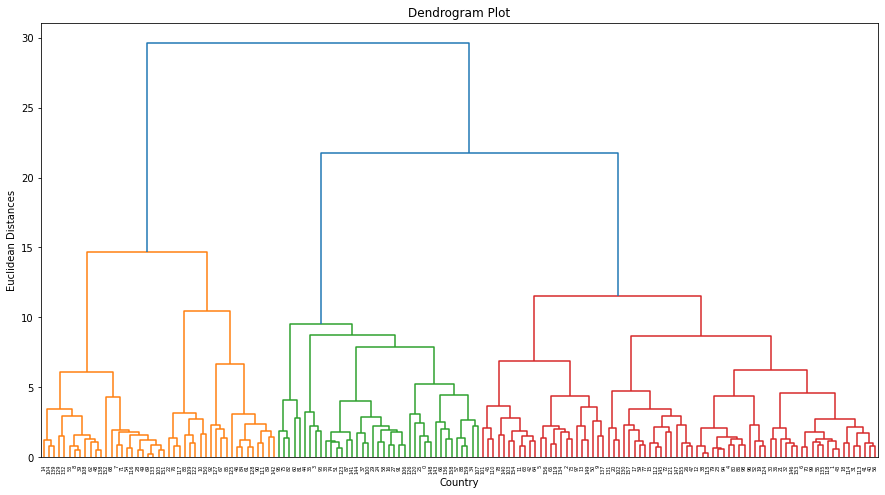

In [78]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

#plotting dendogram
#plt.figure(figsize=(50, 12))
#dend=shc.dendrogram(shc.linkage(scaled_df,method='ward'))
fig=plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Country")
plt.show()

In [79]:
#From above dendogram we can take minimum no of clusters as 2 and maximum number of cluster as 5.As we can see from dendogram 3 in the the right no of clusters ,so we are going to take 3 no of clusters.

Conclusion:DBscan algorithm hepls in hadling noisy data and outliers where as K means is affected by outliers but Dbscan is not efficient with large dataset as compared to K means algorithm.

In [80]:
As a part of conclussion:
import plotly.express as px
fig=px.choropleth(data_frame=df, locationmode='country names', locations='country', color="gdpp", title='gdpp of countries')
fig.show()

In [ ]:
#this is graph of gdp(gross domestic product) from here we can clearly see there are 3 clusters , countries with low gdpp,medium gdpp and high gdpp , but for further understanding we used clustering aldorithms.